In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')

In [4]:
def box_dist_plot(dataframe, column):
    plt.subplot(1,2,1)
    dataframe.boxplot(column)
    
    plt.subplot(1,2,2)
    sns.distplot(dataframe[column])
    
    plt.tight_layout()


# [dataset]

In [5]:
df = pd.read_csv('merge_test1.csv')

In [6]:
# drop extra col
df = df.drop('Unnamed: 0', axis=1)

In [7]:
pd.set_option('display.max_columns', 40)
df.head()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 12th pass,education_Class 9th or below,education_Graduate,education_ITI / Diploma,education_No education,education_not provided,bikeSurvey_Yes,bikeSurvey_not provided,idDetected_True,drivingLicenseSurvey_Yes,drivingLicenseSurvey_not provided,married_Yes,married_not provided,city_Bangalore,city_Delhi/NCR,city_others,city_your city,title_South Delhi,title_Vastrapur,title_West Delhi (Janakpuri),title_others,source_Referrals,source_WhatsApp OptIn Form,source_not provided,source_others,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
0,25.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,4238,149,57,92,4.504703e+05,34.3415
1,20.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,2746,156,58,98,3.035038e+05,25.9330
2,24.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3722,92,33,59,3.426029e+05,16.8930
3,22.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3617,97,35,62,9.442864e+05,20.0390
4,19.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,2689,83,30,53,1.033980e+06,11.8200


In [8]:
df.describe()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 12th pass,education_Class 9th or below,education_Graduate,education_ITI / Diploma,education_No education,education_not provided,bikeSurvey_Yes,bikeSurvey_not provided,idDetected_True,drivingLicenseSurvey_Yes,drivingLicenseSurvey_not provided,married_Yes,married_not provided,city_Bangalore,city_Delhi/NCR,city_others,city_your city,title_South Delhi,title_Vastrapur,title_West Delhi (Janakpuri),title_others,source_Referrals,source_WhatsApp OptIn Form,source_not provided,source_others,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
count,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.00000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,1.053400e+04,10534.000000
mean,29.211885,0.003892,0.030473,0.057148,0.043858,0.190906,0.640782,0.114012,0.006740,0.067875,0.033416,0.061135,0.637650,0.758117,0.074805,0.898994,0.660623,0.256123,0.067211,0.649421,0.078792,0.223467,0.385798,0.081071,0.052022,0.230871,0.051832,0.59626,0.662996,0.011961,0.000285,0.286121,352.277767,60.832637,22.136985,38.695652,3.725202e+04,25.148520
std,10.875285,0.062269,0.171892,0.232137,0.204789,0.393034,0.479794,0.317841,0.081825,0.251544,0.179728,0.239590,0.480702,0.428244,0.263090,0.301351,0.473520,0.436511,0.250399,0.477174,0.269427,0.416588,0.486806,0.272957,0.222082,0.421410,0.221699,0.49067,0.472709,0.108717,0.016874,0.451968,718.006987,83.476012,32.879492,51.144904,1.371072e+05,685.040020
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,8.000000,16.000000,1.321667e+00,0.253000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,49.000000,37.000000,13.000000,24.000000,1.189769e+01,5.474375
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,184.000000,45.000000,16.000000,29.000000,4.232757e+01,10.955750
75%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,242.000000,61.000000,22.000000,39.000000,1.786800e+04,23.165750
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,4944.000000,5319.000000,1872.000000,3447.000000,3.519348e+06,69527.473500


# correlation

In [9]:
cor = df.corr()

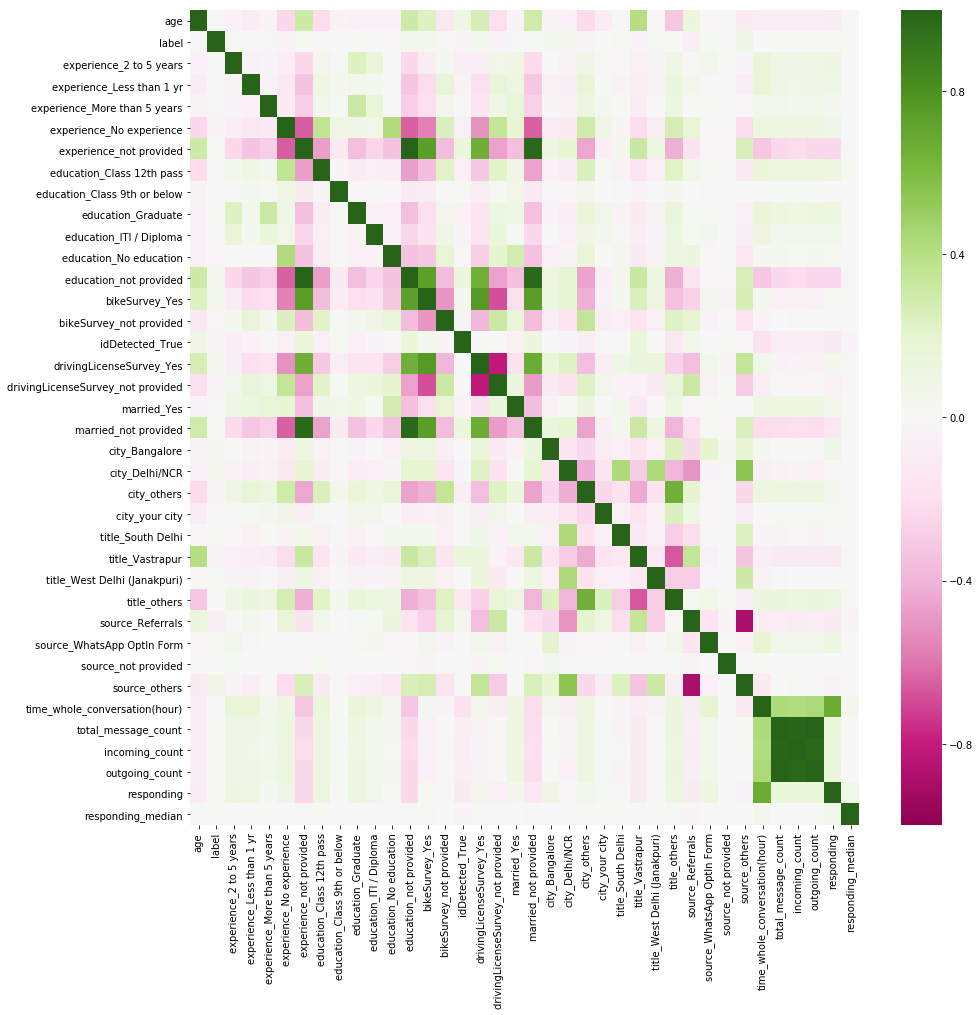

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, cmap='PiYG', vmax=1, vmin=-1)

In [ ]:
# total_message_count, incoming_count, and outgoing_count are highly related

In [11]:
df.shape

(10534, 38)

# Remove outliers
# Remove columns with high correlation

In [12]:
df_cluster = df.copy()


In [13]:
df_cluster.drop(['total_message_count', 'outgoing_count'], axis=1, inplace=True)

In [14]:
# Outliers
df_cluster = df_cluster[(df_cluster['responding_median']<500) & 
                        (df_cluster['responding']<200000) & 
                        (df_cluster['time_whole_conversation(hour)']<1000) &
                        (df_cluster['age']>18)]


In [15]:
df_cluster.shape

(9258, 36)

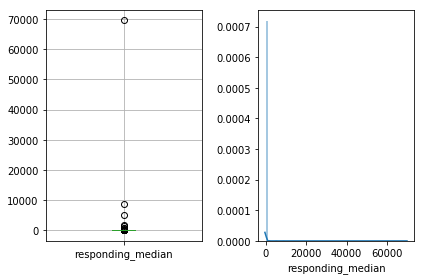

In [16]:
# Before
box_dist_plot(df,'responding_median')


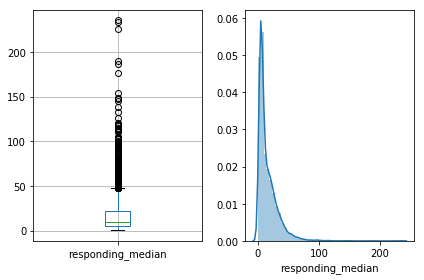

In [17]:
# After
box_dist_plot(df_cluster,'responding_median')

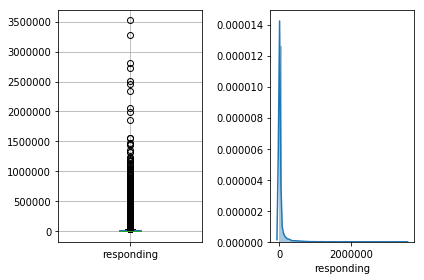

In [18]:
# Before
box_dist_plot(df,'responding')

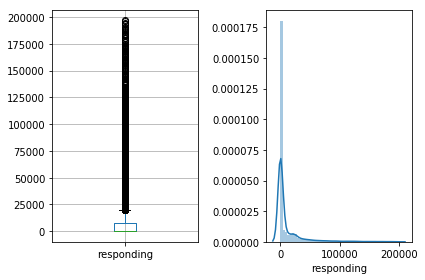

In [19]:
# After
box_dist_plot(df_cluster,'responding')

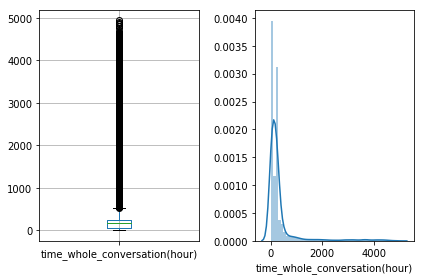

In [20]:
# Before
box_dist_plot(df,'time_whole_conversation(hour)')

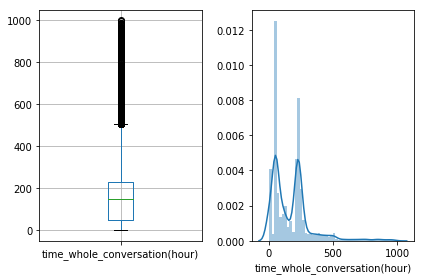

In [21]:
# After
box_dist_plot(df_cluster,'time_whole_conversation(hour)')

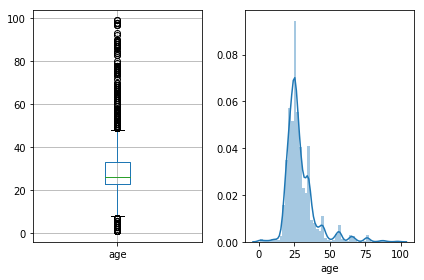

In [22]:
# Before
box_dist_plot(df,'age')

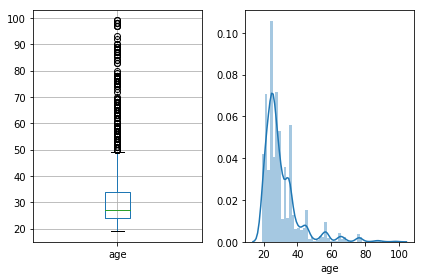

In [23]:
# After
box_dist_plot(df_cluster,'age')

In [24]:
X = df_cluster.drop('label', axis=1)
y = df_cluster['label']

### visulaizaiton

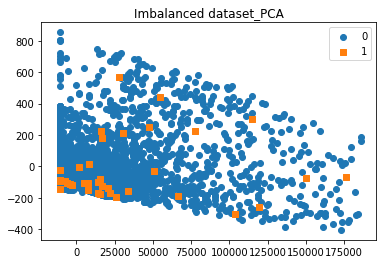

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_2d_space(X_pca, y, 'Imbalanced dataset_PCA')
#plt.savefig('Imbalanced dataset_PCA.png')

### visualization_std

In [26]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

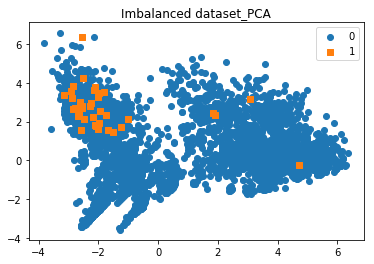

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plot_2d_space(X_pca, y, 'Imbalanced dataset_PCA')
#plt.savefig('Imbalanced dataset_std_PCA.png')

# [Over-sampling] visualization

In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

### RadomOverSampler

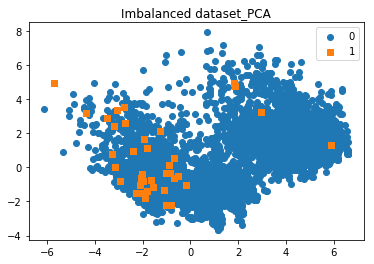

In [29]:
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')
X_resampled, y_resampled = ros.fit_resample(X_std, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)
plot_2d_space(X_pca, y_resampled, 'Imbalanced dataset_PCA')
#plt.savefig('Imbalanced dataset_std_PCA.png

In [30]:
pd.Series(y_resampled).value_counts()

1    9220
0    9220
dtype: int64

### SMOTE

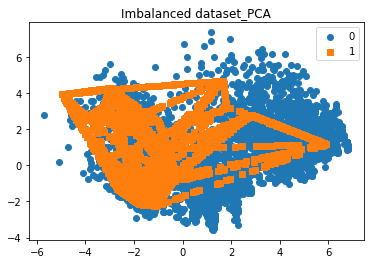

In [51]:
X_resampled, y_resampled = SMOTE().fit_resample(X_std, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)
plot_2d_space(X_pca, y_resampled, 'Imbalanced dataset_PCA')

### ADASYN

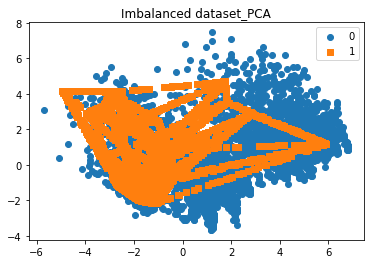

In [52]:
ada = ADASYN(random_state=0)
X_resampled, y_resampled = ada.fit_resample(X_std, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)
plot_2d_space(X_pca, y_resampled, 'Imbalanced dataset_PCA')

In [31]:
pd.Series(y_resampled).value_counts()

1    9220
0    9220
dtype: int64

# [Uunder-sampling] visualization

### ClusterCentroids visualization

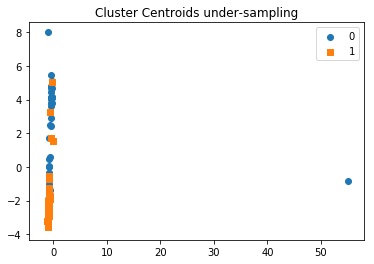

In [54]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import KMeans

cc = ClusterCentroids(sampling_strategy='majority', estimator=KMeans(n_clusters=2), random_state=42)
X_cc, y_cc = cc.fit_resample(X_std, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cc)
plot_2d_space(X_pca, y_cc, 'Cluster Centroids under-sampling')
#plt.savefig('ClusterCentroids.png')

### ClusterCentroids visualization_find outliers and remove it

In [55]:
for i in range(len(X_pca)):
    if X_pca[i][0]>10:
        print(i)

20


In [56]:
X_pca_removeoutlier = X_pca.tolist()

In [57]:
del X_pca_removeoutlier[20]

In [58]:
X_pca_removeoutlier = np.array(X_pca_removeoutlier)

In [59]:
y_cc_removeoutlier = y_cc.tolist()

In [60]:
del y_cc_removeoutlier[20]

In [61]:
y_cc_removeoutlier = np.array(y_cc_removeoutlier)

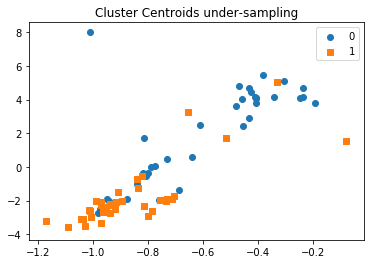

In [62]:
plot_2d_space(X_pca_removeoutlier, y_cc_removeoutlier, 'Cluster Centroids under-sampling')
#plt.savefig('ClusterCentroids_std_PCA.png')

### CNN visualization

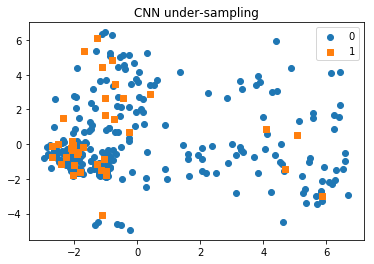

In [63]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(sampling_strategy='majority')
X_cnn, y_cnn = cnn.fit_resample(X_std, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cnn)
plot_2d_space(X_pca, y_cnn, 'CNN under-sampling')

### ENN visualization

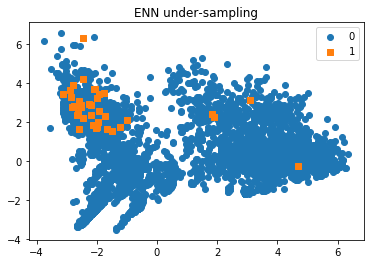

In [64]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_enn, y_enn = enn.fit_resample(X_std, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_enn)
plot_2d_space(X_pca, y_enn, 'ENN under-sampling')

### IHT visualization

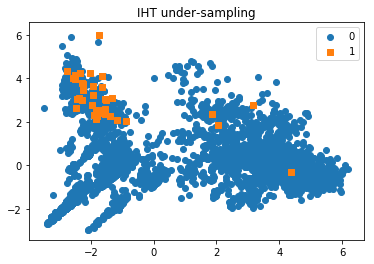

In [65]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold()
X_iht, y_iht = iht.fit_resample(X_std,y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iht)
plot_2d_space(X_pca, y_iht, 'IHT under-sampling')

# [Modeling]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Validation
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [33]:
def roc_plot(y_test, y_pred_prob, title):
    from sklearn.metrics import roc_curve
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)

In [34]:
def plot_coefficients(classifier, feature_names, top_features=5):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    
    plt.bar(np.arange(2 * top_features), coef[top_coefficients])
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(2 * top_features), feature_names[top_coefficients], rotation=90, )
    plt.ylabel('Coefficient')
    plt.xlabel('Feature')

In [169]:
def feature_importance(model, X_train):
    # get importances of each feature
    importances = model.feature_importances_
    # get feature name of each column
    feat_labels = X_train.columns
    # arrange the order of importances from larget to small and extract its index
    indices = np.argsort(importances)[::-1]
    plt.bar(range(20), importances[indices[:20]])
    plt.xticks(range(20), feat_labels[indices[:20]], rotation=90, fontsize=20)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature importance')

# Train test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=4, stratify=y)

### training data + visualization

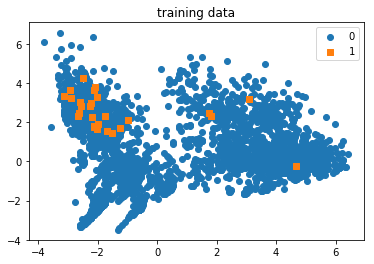

In [69]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plot_2d_space(X_pca, y_train, 'training data')

### testing data + visualization

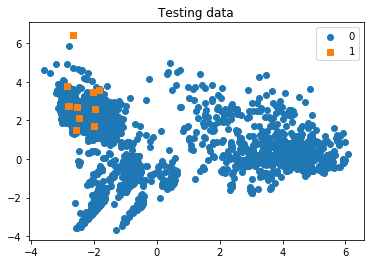

In [70]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plot_2d_space(X_pca, y_test, 'Testing data')

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
n_neighbors = np.arange(1, 20, 1)

# Create hyperparameter options
hyperparameters = dict(n_neighbors=n_neighbors)


In [74]:
knn = GridSearchCV(KNeighborsClassifier(metric='minkowski', p=2), hyperparameters, cv=5, verbose=0)

In [75]:
knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [77]:
# best parameters
knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [78]:
print(confusion_matrix(y_test, y_pred))

[[2767    0]
 [  11    0]]


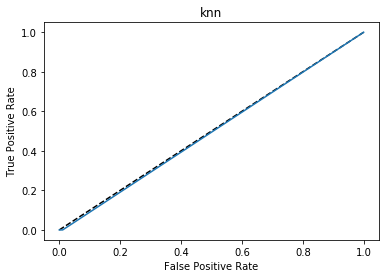

In [86]:
roc_plot(y_test, y_pred_prob, 'knn')

# Logistics

In [38]:
from sklearn.linear_model import LogisticRegression

In [111]:
max_iter = [100, 1000, 2000]
# Create regularization penalty space
penalty = ['none', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, max_iter=max_iter)


In [112]:
logit = GridSearchCV(LogisticRegression(solver='lbfgs'), hyperparameters, cv=5, verbose=0)

In [113]:
logit.fit(X_train, y_train)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [114]:
y_pred = logit.predict(X_test)
y_pred_prob = logit.predict_proba(X_test)[:,1]

In [115]:
# best parameters
logit.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [116]:
print(confusion_matrix(y_test, y_pred))

[[2767    0]
 [  11    0]]


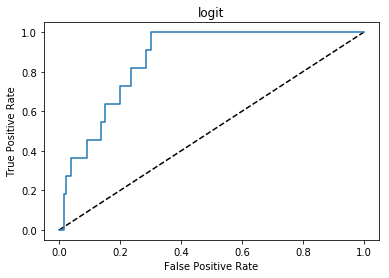

In [117]:
roc_plot(y_test, y_pred_prob, 'logit')

# Randomforest

In [123]:
rf = RandomForestClassifier(criterion='gini', n_estimators=400)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [125]:
print(confusion_matrix(y_test, y_pred))

[[2767    0]
 [  11    0]]


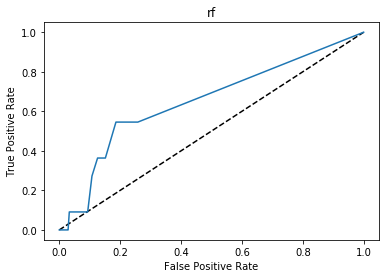

In [127]:
roc_plot(y_test, y_pred_prob, 'rf')

# SVM

In [116]:
from sklearn.svm import SVC

In [117]:
svm = SVC(kernel='linear', probability=True, C=0.1)

In [118]:
svm.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [119]:
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:,1]

In [120]:
print(confusion_matrix(y_test, y_pred))

[[2767    0]
 [  11    0]]


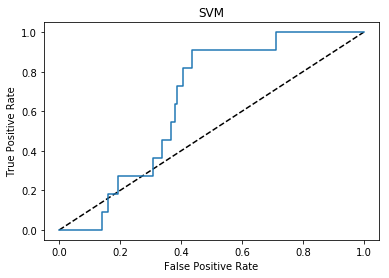

In [122]:
roc_plot(y_test, y_pred_prob, 'SVM')

# Under-sampling (ClusterCentroids) on training data + visualization

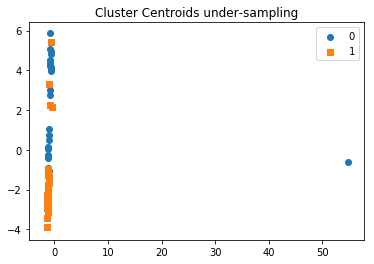

In [40]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import KMeans

cc = ClusterCentroids(sampling_strategy='majority', estimator=KMeans(n_clusters=2))
X_cc, y_cc = cc.fit_resample(X_train, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cc)
plot_2d_space(X_pca, y_cc, 'Cluster Centroids under-sampling')

In [41]:
for i in range(len(X_pca)):
    if X_pca[i][0]>50:
        print(i)

5


In [45]:
X_cc_removeoutlier = X_cc.tolist()

In [46]:
del X_cc_removeoutlier[5]

In [47]:
X_cc_removeoutlier = np.array(X_cc_removeoutlier)

In [48]:
y_cc_removeoutlier = y_cc.tolist()

In [49]:
del y_cc_removeoutlier[5]

In [50]:
y_cc_removeoutlier = np.array(y_cc_removeoutlier)

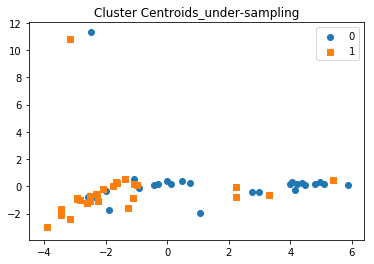

In [51]:
plot_2d_space(pca.fit_transform(X_cc_removeoutlier), y_cc_removeoutlier, 'Cluster Centroids_under-sampling')

# KNN (w/ CC)

In [161]:
n_neighbors = np.arange(1, 20, 1)

# Create hyperparameter options
hyperparameters = dict(n_neighbors=n_neighbors)


In [162]:
knn = GridSearchCV(KNeighborsClassifier(metric='minkowski', p=2), hyperparameters, cv=5, verbose=0)

In [163]:
knn.fit(X_cc_removeoutlier, y_cc_removeoutlier)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [164]:
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [165]:
# best parameters
knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [166]:
print(confusion_matrix(y_test, y_pred))

[[1962  805]
 [   0   11]]


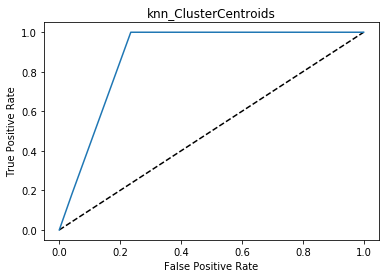

In [167]:
roc_plot(y_test, y_pred_prob, 'knn_ClusterCentroids')

In [ ]:
# save the model to pickle foe later use
#import pickle
#pickle.dump(knn, open('knn_for_flask_2.pickle', 'wb'), protocol=2)

# Logistics (w/ CC)

In [72]:
from sklearn.linear_model import LogisticRegression

In [111]:
max_iter = [100, 1000, 2000]
# Create regularization penalty space
penalty = ['none', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, max_iter=max_iter)


In [118]:
logit = GridSearchCV(LogisticRegression(solver='lbfgs'), hyperparameters, cv=5, verbose=0)

In [119]:
logit.fit(X_cc_removeoutlier, y_cc_removeoutlier)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [120]:
y_pred = logit.predict(X_test)
y_pred_prob = logit.predict_proba(X_test)[:,1]

In [121]:
# best parameters
logit.best_estimator_.get_params()

{'C': 7.742636826811269,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [122]:
print(confusion_matrix(y_test, y_pred))

[[2131  636]
 [   3    8]]


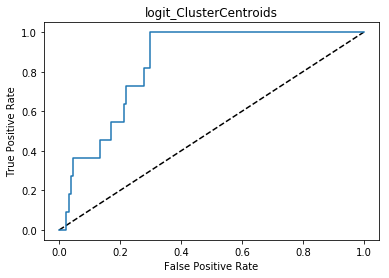

In [123]:
roc_plot(y_test, y_pred_prob, 'logit_ClusterCentroids')

# Randomforest (w/ CC)

In [130]:
from sklearn.ensemble import RandomForestClassifier


In [148]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
hyperparameters = dict(n_estimators = n_estimators)

In [149]:
rf = GridSearchCV(RandomForestClassifier(criterion='gini'), hyperparameters, cv=3, verbose=0)

In [150]:
rf.fit(X_cc_removeoutlier, y_cc_removeoutlier)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [151]:
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [152]:
# best parameters
rf.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [153]:
print(confusion_matrix(y_test, y_pred))

[[ 648 2119]
 [   0   11]]


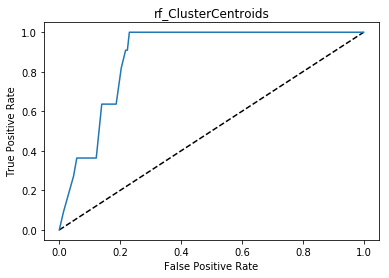

In [155]:
roc_plot(y_test, y_pred_prob, 'rf_ClusterCentroids')

# SVM (w/ CC)

In [52]:
from sklearn.svm import SVC

In [53]:
# Create regularization hyperparameter space
C = [10.**i for i in np.arange(-1,4)]

# Create hyperparameter options
hyperparameters = dict(C=C)


In [54]:
svm = GridSearchCV(SVC(kernel='linear', probability=True), hyperparameters, cv=5, verbose=0)

In [55]:
svm.fit(X_cc_removeoutlier, y_cc_removeoutlier)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=True, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:,1]

In [57]:
# best parameters
svm.best_estimator_.get_params()

{'C': 0.1,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [58]:
print(confusion_matrix(y_test, y_pred))

[[1941  826]
 [   0   11]]


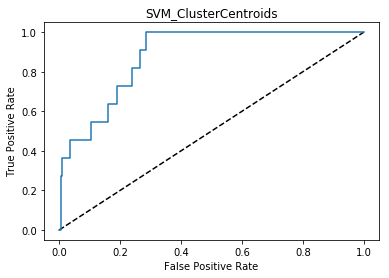

In [59]:
roc_plot(y_test, y_pred_prob, 'SVM_ClusterCentroids')

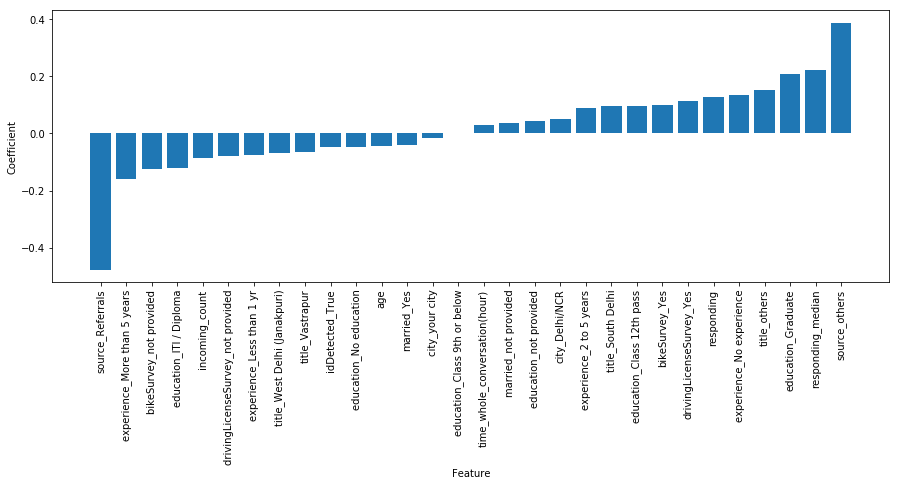

In [60]:
plot_coefficients(svm.best_estimator_, X.columns, 15)

# Under-sampling (CNN) on training data + visualization

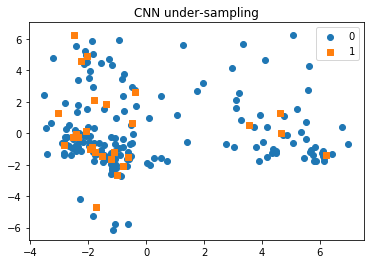

In [62]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(sampling_strategy='majority')
X_cnn, y_cnn = cnn.fit_resample(X_train, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cnn)
plot_2d_space(X_pca, y_cnn, 'CNN under-sampling')

# KNN (w/ CNN)

In [63]:
n_neighbors = np.arange(1, 20, 1)

# Create hyperparameter options
hyperparameters = dict(n_neighbors=n_neighbors)


In [64]:
knn = GridSearchCV(KNeighborsClassifier(metric='minkowski', p=2), hyperparameters, cv=5, verbose=0)

In [66]:
knn.fit(X_cnn, y_cnn)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [68]:
# best parameters
knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

In [69]:
print(confusion_matrix(y_test, y_pred))

[[2767    0]
 [  11    0]]


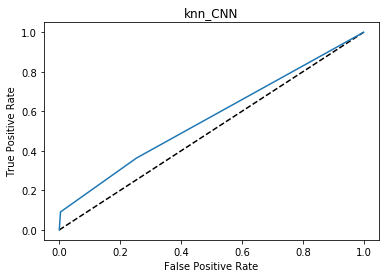

In [70]:
roc_plot(y_test, y_pred_prob, 'knn_CNN')

In [ ]:
# save the model to pickle foe later use
#import pickle
#pickle.dump(knn, open('knn_for_flask_2.pickle', 'wb'), protocol=2)

# Logistics (w/ CNN)

In [71]:
from sklearn.linear_model import LogisticRegression

In [132]:
max_iter = [100, 1000, 2000]
# Create regularization penalty space
penalty = ['none', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, max_iter=max_iter)


In [133]:
logit = GridSearchCV(LogisticRegression(solver='lbfgs'), hyperparameters, cv=5, verbose=0)

In [134]:
logit.fit(X_cnn, y_cnn)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [135]:
y_pred = logit.predict(X_test)
y_pred_prob = logit.predict_proba(X_test)[:,1]

In [136]:
# best parameters
logit.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [137]:
print(confusion_matrix(y_test, y_pred))

[[2767    0]
 [  11    0]]


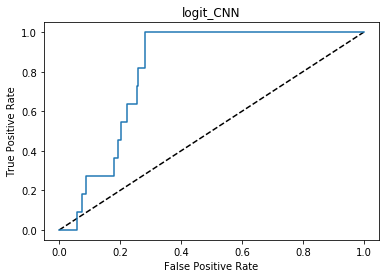

In [138]:
roc_plot(y_test, y_pred_prob, 'logit_CNN')

# Randomforest (w/ CNN)

In [79]:
from sklearn.ensemble import RandomForestClassifier


In [139]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
hyperparameters = dict(n_estimators = n_estimators)

In [140]:
rf = GridSearchCV(RandomForestClassifier(criterion='gini'), hyperparameters, cv=3, verbose=0)

In [141]:
rf.fit(X_cnn, y_cnn)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [142]:
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [143]:
# best parameters
rf.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [144]:
print(confusion_matrix(y_test, y_pred))

[[2767    0]
 [  11    0]]


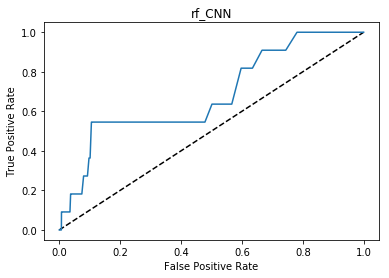

In [145]:
roc_plot(y_test, y_pred_prob, 'rf_CNN')

# SVM (w/ CNN)

In [173]:
from sklearn.svm import SVC

In [103]:
svm = SVC(kernel='linear', probability=True, C=0.1)

In [104]:
svm.fit(X_cnn, y_cnn)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [105]:
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:,1]

In [106]:
print(confusion_matrix(y_test, y_pred))

[[2767    0]
 [  11    0]]


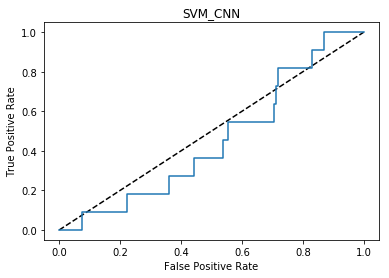

In [108]:
roc_plot(y_test, y_pred_prob, 'SVM_CNN')

# Over-sampling on training dataset and visualization

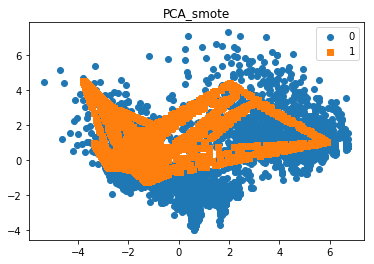

In [93]:
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_smote)
plot_2d_space(X_pca, y_smote, 'PCA_smote')

# KNN (w/ SMOTE)

In [104]:
n_neighbors = np.arange(1, 20, 1)

# Create hyperparameter options
hyperparameters = dict(n_neighbors=n_neighbors)


In [105]:
knn = GridSearchCV(KNeighborsClassifier(metric='minkowski', p=2), hyperparameters, cv=5, verbose=0)

In [106]:
knn.fit(X_smote, y_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [107]:
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [108]:
# best parameters
knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [109]:
print(confusion_matrix(y_test, y_pred))

[[2742   25]
 [  11    0]]


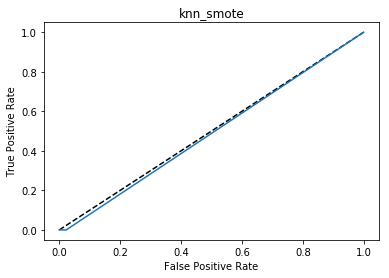

In [110]:
roc_plot(y_test, y_pred_prob, 'knn_smote')

# Logistics (w/ SMOTE)

In [72]:
from sklearn.linear_model import LogisticRegression

In [111]:
max_iter = [100, 1000, 2000]
# Create regularization penalty space
penalty = ['none', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, max_iter=max_iter)


In [124]:
logit = GridSearchCV(LogisticRegression(solver='lbfgs'), hyperparameters, cv=5, verbose=0)

In [125]:
logit.fit(X_smote, y_smote)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [126]:
y_pred = logit.predict(X_test)
y_pred_prob = logit.predict_proba(X_test)[:,1]

In [127]:
# best parameters
logit.best_estimator_.get_params()

{'C': 10000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [128]:
print(confusion_matrix(y_test, y_pred))

[[2220  547]
 [   3    8]]


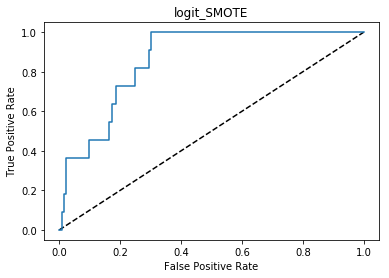

In [129]:
roc_plot(y_test, y_pred_prob, 'logit_SMOTE')

# Randomforest (w/ SMOTE)

In [128]:
rf = RandomForestClassifier(criterion='gini', n_estimators=400)
rf.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [130]:
print(confusion_matrix(y_test, y_pred))

[[2756   11]
 [  11    0]]


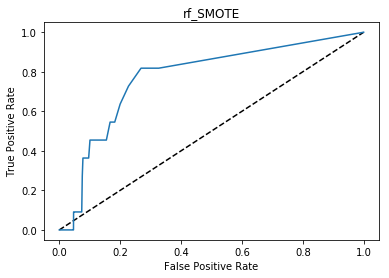

In [131]:
roc_plot(y_test, y_pred_prob, 'rf_SMOTE')

# SVM (w/ SMOTE)

In [173]:
from sklearn.svm import SVC

In [110]:
svm = SVC(kernel='linear', probability=True, C=0.1)

In [111]:
svm.fit(X_smote, y_smote)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:,1]

In [113]:
print(confusion_matrix(y_test, y_pred))

[[2116  651]
 [   3    8]]


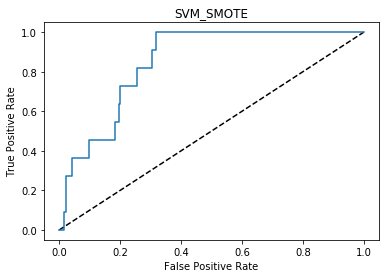

In [114]:
roc_plot(y_test, y_pred_prob, 'SVM_SMOTE')